### Data Process and Graph Building for Voting Prediction of UN

In [1]:
import pandas as pd
import json
import numpy as np

voting_data_path = 'data/UN_DATA.csv'

# read in the data
df = pd.read_csv(voting_data_path)
df['index'] = df.index

# Define the path to the embeddings .npy file
embeddings_npy_path = 'data/embeddings.npy'

# Load the embeddings from the .npy file
title_embeddings = np.load(embeddings_npy_path)

<ipython-input-1-64dc9fa98cd0>:8: DtypeWarning: Columns (228,229,230,232,235,236,238,239,240,241,242,243,245,246,247,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(voting_data_path)


In [2]:
org_data_path = 'data/org_list.json'

org_list = json.load(open(org_data_path))

conversion_dict = {
    'RUSSIA': 'RUSSIAN FEDERATION',
    'USSR': 'RUSSIAN FEDERATION',
    'VIETNAM': 'VIET NAM',
    'TANZANIA': 'UNITED REPUBLIC OF TANZANIA',
    'SOUTH KOREA': 'REPUBLIC OF KOREA',
    'BRUNEI': 'BRUNEI DARUSSALAM',
    'CONGO (KINSHASA)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
    'UAE': 'UNITED ARAB EMIRATES',
    'THE BAHAMAS': 'BAHAMAS',
    'MICRONESIA': 'MICRONESIA (FEDERATED STATES OF)',
    'NORTH KOREA': 'DEMOCRATIC PEOPLE\'S REPUBLIC OF KOREA',
    'UNITED STATES OF AMERICA': 'UNITED STATES',
    'ST. LUCIA': 'SAINT LUCIA',
    'ST. VINCENT AND THE GRENADINES': 'SAINT VINCENT AND THE GRENADINES',
    'ANTIGUA & BARBUDA': 'ANTIGUA AND BARBUDA',
    'ST. KITTS AND NEVIS': 'SAINT KITTS AND NEVIS',
    'MACEDONIA': 'NORTH MACEDONIA',
    'EAST TIMOR': 'TIMOR-LESTE'
    
}

In [3]:
country_adjacency_data_path = 'data/adjacency.json'

country_adjacency = json.load(open(country_adjacency_data_path))

In [24]:
# get the title line
title_line = df.columns.values.tolist()

print(title_line)

voters = title_line[11:-1]
resolutions = df['Title'].tolist()

print(len(voters))
print(len(resolutions))
print(voters)

['Council', 'Date', 'Title', 'Resolution', 'TOTAL VOTES', 'NO-VOTE COUNT', 'ABSENT COUNT', 'NO COUNT', 'YES COUNT', 'Link', 'token', 'SENEGAL', 'MALAYSIA', 'VENEZUELA (BOLIVARIAN REPUBLIC OF)', 'UNITED KINGDOM', 'RUSSIAN FEDERATION', 'JAPAN', 'ANGOLA', 'URUGUAY', 'SPAIN', 'EGYPT', 'NEW ZEALAND', 'UNITED STATES', 'FRANCE', 'CHINA', 'UKRAINE', 'NIGER', 'SAINT VINCENT AND THE GRENADINES', 'ESTONIA', 'SOUTH AFRICA', 'VIET NAM', 'BELGIUM', 'GERMANY', 'TUNISIA', 'INDONESIA', 'DOMINICAN REPUBLIC', 'BRAZIL', 'UNITED REPUBLIC OF TANZANIA', 'PHILIPPINES', 'ALGERIA', 'BENIN', 'DENMARK', 'ROMANIA', 'ARGENTINA', 'GREECE', 'AUSTRIA', 'SWITZERLAND', 'CYPRUS', 'MOZAMBIQUE', 'SUDAN', 'FIJI', 'BULGARIA', 'CUBA', 'UGANDA', 'ZAMBIA', 'SOUTH SUDAN', 'MONACO', 'REPUBLIC OF KOREA', 'REPUBLIC OF MOLDOVA', 'SAN MARINO', 'YEMEN', 'ITALY', 'BURUNDI', 'HUNGARY', 'CAMBODIA', 'MALAWI', 'NAURU', 'NICARAGUA', 'BRUNEI DARUSSALAM', 'POLAND', 'THAILAND', 'MALDIVES', 'SIERRA LEONE', 'TURKEY', 'CABO VERDE', 'PAPUA NEW GUI

In [25]:
org_index_list = {}
for org_name in org_list:
    members = org_list[org_name]
    members_idx = []
    for c in members:
        # make m capitalized
        m = c.upper()
        if m in conversion_dict:
            m = conversion_dict[m]
        if m in voters:
            # get the index
            index = voters.index(m)
            members_idx.append(index)
        else:
            #print(m)
            pass
    org_index_list[org_name] = members_idx

print(org_index_list)

{'European Union (EU)': [34, 20, 40, 152, 36, 197, 30, 17, 139, 12, 21, 33, 52, 90, 50, 158, 103, 105, 148, 87, 58, 179, 31, 99, 173, 8, 96], 'North Atlantic Treaty Organization (NATO)': [11, 150, 3, 12, 21, 50, 62, 87, 20, 105, 8, 179, 163, 30, 104, 33, 52, 58, 197, 99, 173, 17, 158, 103, 40, 31, 166, 152, 169, 143], 'Association of Southeast Asian Nations (ASEAN)': [57, 53, 23, 222, 1, 134, 27, 83, 59, 19], 'Mercosur': [32, 25, 192, 7], 'African Union (AU)': [28, 6, 29, 116, 188, 51, 63, 68, 84, 187, 107, 228, 180, 120, 92, 9, 77, 79, 124, 106, 121, 182, 171, 76, 115, 153, 113, 119, 74, 67, 54, 142, 82, 128, 147, 37, 161, 15, 170, 154, 130, 0, 125, 61, 98, 18, 44, 38, 26, 159, 22, 42, 43, 97], 'Commonwealth of Independent States (CIS)': [81, 66, 131, 91, 78, 202, 4, 118, 183, 111, 14], 'Shanghai Cooperation Organization (SCO)': [13, 4, 91, 78, 118, 111, 122, 95], 'Organization of American States (OAS)': [157, 32, 174, 145, 186, 194, 25, 150, 164, 114, 117, 41, 165, 24, 123, 181, 160,

In [26]:
# process country adjacency

country_adjacency_index = {}

for c in country_adjacency:
    # make c capitalized
    m = c.upper()
    if m in conversion_dict:
        m = conversion_dict[m]
    if m in voters:
        # get the index
        index = voters.index(m)
        
        country_adjacency_index[index] = []
        for neighbor in country_adjacency[c]:
            n = neighbor.upper()
            if n in conversion_dict:
                n = conversion_dict[n]
            if n in voters:
                # get the index
                n_index = voters.index(n)
                country_adjacency_index[index].append(n_index)
            else:
                print(n)
                pass

print(country_adjacency_index)

TAIWAN
{185: [23], 150: [11], 183: [220, 135, 111, 91], 169: [166, 152, 201, 94], 103: [58, 4, 158, 131], 53: [59, 222, 19], 106: [153, 98, 92, 79, 38], 108: [122], 199: [37, 18], 32: [25, 194, 192, 164, 7], 194: [85, 25, 192, 164, 32], 68: [77, 170, 121, 84, 187, 155], 188: [142, 29, 15, 205, 171, 159], 171: [205, 188, 159], 69: [73, 9, 191, 140, 49, 80, 75, 102, 151, 172], 5: [4], 173: [34, 52, 50, 152], 156: [137, 186, 141, 181], 94: [152, 201, 169], 76: [115, 142, 0, 205, 119, 61], 4: [11, 58, 17, 158, 103, 14, 131, 133, 66, 139, 163, 91, 13, 178, 93, 5], 21: [87, 20, 105, 12, 35, 58, 34, 197, 30], 177: [16], 8: [12, 129, 179, 147], 119: [205, 76, 61], 87: [20, 21], 172: [69, 49, 151], 26: [180, 42, 153, 51, 154, 37, 43, 54], 205: [142, 76, 188, 119, 171], 121: [77, 68, 155], 45: [12], 49: [92, 79, 69, 172], 95: [220, 135, 13, 122, 134], 166: [143, 201, 169, 33], 151: [69, 102, 172], 122: [13, 146, 95, 138, 134, 108, 71], 66: [4, 81, 133, 220, 62], 113: [18], 153: [42, 26, 98, 106,

In [27]:
# set up torch g graph
import torch
import torch.nn.functional as F
import torch_geometric
from torch_geometric.data import Data


In [40]:
cap_resolution = None
cap_voter = None
cap_org = None

# cap_resolution = 500
# cap_voter = 100
# cap_org = 0

if cap_resolution is None:
    len_resolutions = len(resolutions)
else:
    len_resolutions = cap_resolution


if cap_voter is None:
    len_voters = len(voters)
else:
    len_voters = cap_voter


if cap_org is None:
    len_orgs = len(org_index_list)
else:
    len_orgs = cap_org

# Create node features (one-hot encoding for voters)
node_features = torch.zeros(len_voters + len_orgs, 64)

'''
def get_resolution_idx(idx):
    return len_voters + len_orgs + idx
'''

def get_voter_idx(idx):
    return idx

def get_org_idx(idx):
    return len_voters + idx

print(len_voters+len_orgs)

292


In [41]:
# Create edge indices and edge features based on the votes
edges = []
edge_features = []
vote_types = {'Y': 0, 'N': 1, 'A': 2, 'X': 3}
member_type = 4
adjacent_type = 5

'''
for resolution_index, resolution in enumerate(resolutions):
    if resolution_index >= cap_resolution:
        break
    for voter_index, voter in enumerate(voters):
        if voter_index >= cap_voter:
            break
        vote = df.at[resolution_index, voter]
        if vote in vote_types:
            edges.append((get_voter_idx(voter_index), get_resolution_idx(resolution_index)))
            edge_features.append(vote_types[vote])
'''

for org_idx, org_name in enumerate(org_index_list):
    if org_idx >= len_orgs:
        break
    org_members = org_index_list[org_name]
    for voter_idx in org_members:
        if voter_idx >= len_voters:
            continue
        edges.append((get_voter_idx(voter_idx), get_org_idx(org_idx)))
        edge_features.append(member_type)

for c in country_adjacency_index:
    for n in country_adjacency_index[c]:
        if c < n and c < len_voters and n < len_voters:
            edges.append((c, n))
            edge_features.append(adjacent_type)

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
edge_features = torch.tensor(edge_features, dtype=torch.float).view(1, -1)

# Create a PyTorch Geometric Data object
graph_data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_features)

edge_index = graph_data.edge_index

# Print the created graph data
print(graph_data, graph_data.num_features)


Data(x=[292, 64], edge_index=[2, 1035], edge_attr=[1, 1035]) 64


In [42]:
edge_colors_map =[ (0.2, 0.2, 0.2), (0.2, 0.2, 1), (1, 0.2, 0.2), (0.2, 0.2, 1), (0.6, 0.6, 0.2), (0.2, 0.6, 0.2)]
node_colors_map = [(1, 0.6 , 0.6), (0.6, 0.6, 1), (0.8, 0.6, 0)]

In [43]:
edge_features, len_resolutions, len_voters

(tensor([[4., 4., 4.,  ..., 5., 5., 5.]]), 7855, 259)

/opt/anaconda3/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


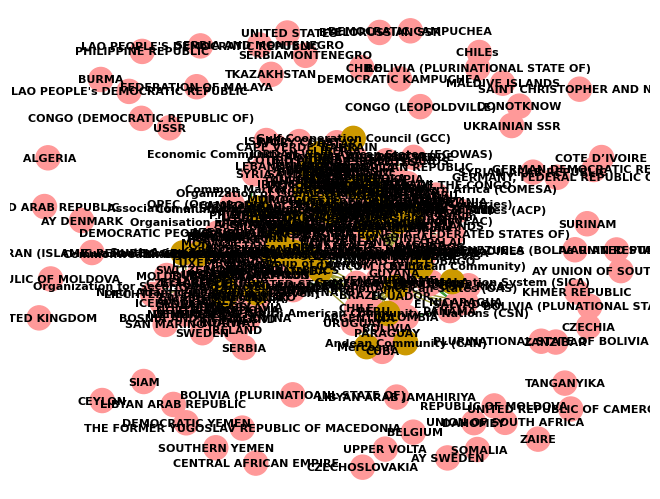

In [80]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Convert PyTorch Geometric data to a NetworkX graph
G = nx.Graph()

# Add nodes with titles
'''
for i, resolution in enumerate(resolutions):
    if i >= cap_resolution:
        break
    G.add_node(get_resolution_idx(i), title=resolution[:10], color = node_colors_map[1], bipartite=0)
'''

for i, voter in enumerate(voters):
    if i >= len_voters:
        break
    G.add_node(get_voter_idx(i), title=voter, color = node_colors_map[0], bipartite=1)

for i, org_name in enumerate(org_index_list):
    if i >= len_orgs:
        break
    G.add_node(get_org_idx(i), title=org_name, color = node_colors_map[2], bipartite=1)

# Add edges with colors based on edge features
for edge, edge_feature in zip(edge_index.t().tolist(), edge_features[0].tolist()):
    #print(edge, edge_feature)
    G.add_edge(edge[0], edge[1], color=edge_colors_map[int(edge_feature)])

# Draw the graph
left_nodes = [i for i in range(len_resolutions)] + [get_org_idx(i) for i in range(len_orgs)]
#pos = nx.bipartite_layout(G, nodes = left_nodes )  # You can use different layout algorithms
pos = nx.spring_layout(G, k=0.1, iterations=20)
edge_colors = [edge[2]['color'] for edge in G.edges(data=True)]
node_colors = [node[1]['color'] for node in G.nodes(data=True)]

labels = nx.get_node_attributes(G, 'title')

nx.draw(G, pos, with_labels=True, labels=labels, font_color='black', font_size=8, font_weight='bold', node_color=node_colors, edge_color=edge_colors, width=1, cmap=plt.cm.Blues)
plt.show()

In [44]:
import torch
import torch_scatter
import torch.nn as nn
import torch.nn.functional as F

import torch_geometric.nn as pyg_nn
import torch_geometric.utils as pyg_utils

from torch import Tensor
from typing import Union, Tuple, Optional
from torch_geometric.typing import (OptPairTensor, Adj, Size, NoneType,
                                    OptTensor)

from torch.nn import Parameter, Linear
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.utils import remove_self_loops, add_self_loops, softmax

title_projection_dim = 128
voter_embedding_dim = 64

class GNNStack(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, args, emb=False):
        super(GNNStack, self).__init__()

        conv_model = self.build_conv_model(args.model_type)
        self.convs = nn.ModuleList()
        self.convs.append(conv_model(input_dim, voter_embedding_dim))
        assert (args.num_layers >= 1), 'Number of layers is not >=1'
        for l in range(args.num_layers-1):
            self.convs.append(conv_model(args.heads * voter_embedding_dim, voter_embedding_dim))

        self.node_embedding = nn.Embedding(len_voters + len_orgs, voter_embedding_dim)
        self.all_node_index = torch.tensor([i for i in range(len_voters + len_orgs)], dtype=torch.long)

        self.proj = nn.Linear(384, title_projection_dim)

        self.edge_index = edge_index

        # post-message-passing
        self.post_mp = nn.Sequential(
            nn.Linear(args.heads * voter_embedding_dim + title_projection_dim, hidden_dim), 
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim))

        self.dropout = args.dropout
        self.num_layers = args.num_layers

        self.emb = emb

        class_weights = torch.tensor([1, 5, 3, 4])
        class_weights = class_weights / class_weights.sum()

        self.criterion = nn.CrossEntropyLoss(weight=class_weights)

    def build_conv_model(self, model_type):
        if model_type == 'GraphSage':
            return GraphSage
        elif model_type == 'GAT':
            return GAT
        elif model_type == 'GraphSageHetero':
            return GraphSageHetero
        else:
            raise ValueError('Conv Model {} not recognized.'.format(model_type))

    def forward(self, x):
        idx = x[:, -1].long()
        title = x[:, :-1].float()
        edge_index = self.edge_index

        node_embed = self.node_embedding(self.all_node_index)
        for i in range(self.num_layers):
            #print(node_embed.shape)
            node_embed = self.convs[i](node_embed, edge_index, features = self.all_node_index)
            node_embed = F.relu(node_embed)
            node_embed = F.dropout(node_embed, p=self.dropout,training=self.training)
            #print(node_embed.shape)


        node_embed = node_embed[idx]
        title_embed = self.proj(title)

        x = torch.cat([node_embed, title_embed], dim=1)

        x = self.post_mp(x)

        if self.emb == True:
            return x

        return F.softmax(x, dim=1)

    def get_embeddings(self):
        node_embed = self.node_embedding(self.all_node_index)
        for i in range(self.num_layers):
            node_embed = self.convs[i](node_embed, self.edge_index, features = self.all_node_index)
            node_embed = F.relu(node_embed)
        return node_embed.detach().numpy()

    def loss(self, pred, label):
        return self.criterion(pred, label)

In [45]:
class GraphSage(MessagePassing):

    def __init__(self, in_channels, out_channels, normalize = True,
                 bias = False, **kwargs):
        super(GraphSage, self).__init__(**kwargs)

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.normalize = normalize

        self.lin_l = None
        self.lin_r = None

        self.lin_l = torch.nn.Linear(in_channels, out_channels, bias=bias)
        self.lin_r = torch.nn.Linear(in_channels, out_channels, bias=bias)

        self.reset_parameters()

    def reset_parameters(self):
        
        with torch.no_grad():
            # fill l with identity
            self.lin_l.weight.copy_(torch.eye(self.in_channels, self.out_channels))
            #self.lin_l.bias.fill_(0)

            self.lin_r.weight.fill_(0)
            #self.lin_r.bias.fill_(0)

    def forward(self, x, edge_index, size = None, features = None):
        """"""
        out = None

        r = self.propagate(edge_index, x=(x, x), size=size)
        out = self.lin_l(x) + self.lin_r(r)

        if self.normalize:
            out = F.normalize(out, p=2.0, dim=-1)

        return out

    def message(self, x_j):
        out = x_j
        return out

    def aggregate(self, inputs, index, dim_size = None):
        # The axis along which to index number of nodes.
        node_dim = self.node_dim

        out = torch_scatter.scatter(inputs, index, dim = node_dim, dim_size=dim_size, reduce='mean')
        return out


In [46]:
class GraphSageHetero(MessagePassing):

    def __init__(self, in_channels, out_channels, normalize = True,
                 bias = False, **kwargs):
        super(GraphSageHetero, self).__init__(**kwargs)

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.normalize = normalize

        self.lin_l_voter = torch.nn.Linear(in_channels, out_channels, bias=bias)
        self.lin_l_org = torch.nn.Linear(in_channels, out_channels, bias=bias)

        self.lin_r = torch.nn.Linear(in_channels, out_channels, bias=bias)

        self.reset_parameters()

    def reset_parameters(self):
        with torch.no_grad():
            # fill l with identity
            self.lin_l_voter.weight.copy_(torch.eye(self.in_channels, self.out_channels))
            #self.lin_l_voter.bias.fill_(0)

            self.lin_l_org.weight.copy_(torch.eye(self.in_channels, self.out_channels))
            #self.lin_l_org.bias.fill_(0)

            self.lin_r.weight.fill_(0)
            #self.lin_r.bias.fill_(0)
            
    def forward(self, x, edge_index, size = None, features = None):
        """"""
        out = None

        assert features is not None

        l_v = self.lin_l_voter(x)
        l_o = self.lin_l_org(x)
        l = torch.where((features < len_voters).unsqueeze(1), l_v, l_o)

        r = self.propagate(edge_index, x=(x, x), size=size)
        out = l + self.lin_r(r)

        if self.normalize:
            out = F.normalize(out, p=2.0, dim=-1)

        return out

    def message(self, x_j):
        out = x_j
        return out

    def aggregate(self, inputs, index, dim_size = None):
        # The axis along which to index number of nodes.
        node_dim = self.node_dim

        out = torch_scatter.scatter(inputs, index, dim = node_dim, dim_size=dim_size, reduce='mean')
        return out


In [47]:
class GAT(MessagePassing):

    def __init__(self, in_channels, out_channels, heads = 2,
                 negative_slope = 0.2, dropout = 0., **kwargs):
        super(GAT, self).__init__(node_dim=0, **kwargs)

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.heads = heads
        self.negative_slope = negative_slope
        self.dropout = dropout

        self.lin_l = nn.Linear(in_channels, out_channels * heads)
        self.lin_r = nn.Linear(in_channels, out_channels * heads)

        self.att_l = nn.Parameter(torch.Tensor(heads, out_channels))
        self.att_r = nn.Parameter(torch.Tensor(heads, out_channels))

        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.lin_l.weight)
        nn.init.xavier_uniform_(self.lin_r.weight)
        nn.init.xavier_uniform_(self.att_l)
        nn.init.xavier_uniform_(self.att_r)

    def forward(self, x, edge_index, size = None, features = None):

        H, C = self.heads, self.out_channels

        N = x.shape[0]
        emb_l, emb_r = self.lin_l(x).reshape(N, H, C), self.lin_r(x).reshape(N, H, C)  # shape (N, H*C)
        alpha_l = torch.stack([torch.matmul(emb_l[:, i, :], self.att_l[i, :]) for i in range(H)]).permute((1, 0)) # shape (N, H)
        alpha_r = torch.stack([torch.matmul(emb_r[:, i, :], self.att_r[i, :]) for i in range(H)]).permute((1, 0)) # shape (N, H)
        out = self.propagate(edge_index, x = emb_r, alpha = (alpha_l, alpha_r), size=size).reshape((N, -1))

        return out


    def message(self, x_j, alpha_j, alpha_i, index, ptr, size_i):

        att = F.leaky_relu(alpha_j + alpha_i, negative_slope=self.negative_slope)
        alpha = torch_geometric.utils.softmax(att, index, ptr, num_nodes=size_i)
        alpha = F.dropout(alpha, p=self.dropout, training=self.training)
        out = alpha.unsqueeze(2) * x_j

        return out


    def aggregate(self, inputs, index, dim_size = None):

        out = torch_scatter.scatter(inputs, index, dim = self.node_dim, dim_size=dim_size, reduce='sum')

        return out

In [48]:
import pandas as pd
import torch
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

class VoterDataset(Dataset):
    def __init__(self, data):
        self.data = data 
        print('data shape: ', self.data.shape)
        print(data.index)

        self.features = []
        self.labels = []

        # for each line
        for i in tqdm(range(len(self.data))):
            index = self.data.iloc[i]['index']
            cur_line = self.data.iloc[i]
            title_feature = title_embeddings[index]

            for i, voter in enumerate(voters):
                vote = cur_line[voter]

                if vote not in vote_types:
                    continue

                feature = np.concatenate((title_feature, [i]), 0)

                self.features.append(feature)
                self.labels.append(vote_types[vote])

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
        

In [202]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
valid_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

train_dataset = VoterDataset(train_data)
valid_dataset = VoterDataset(valid_data)
test_dataset = VoterDataset(test_data)

data shape:  (6284, 271)
Index([6072,  432, 6001, 6308, 2118, 3832, 4398, 1108, 5523, 7678,
       ...
       6265, 5734, 3092, 3772, 5191, 5226, 5390,  860, 7603, 7270],
      dtype='int64', length=6284)


  0%|          | 12/6284 [00:00<00:55, 113.11it/s]

100%|██████████| 6284/6284 [00:22<00:00, 285.37it/s]


data shape:  (785, 271)
Index([6321, 1103, 2897, 1869, 1487,  828, 6353, 4477,  251, 1671,
       ...
       7658, 7847, 4999, 1172, 1242, 7204, 6607, 5260, 3859, 3121],
      dtype='int64', length=785)


100%|██████████| 785/785 [00:01<00:00, 436.09it/s]


data shape:  (786, 271)
Index([4231,  308, 1017, 6682, 6043, 1406,  334, 3194, 4270,  381,
       ...
        425, 5498, 3855, 7836, 5381, 4755, 1407, 4575,  982, 3413],
      dtype='int64', length=786)


100%|██████████| 786/786 [00:01<00:00, 401.35it/s]


In [203]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [49]:
import torch.optim as optim

def build_optimizer(args, params):
    weight_decay = args.weight_decay
    filter_fn = filter(lambda p : p.requires_grad, params)
    if args.opt == 'adam':
        optimizer = optim.Adam(filter_fn, lr=args.lr, weight_decay=weight_decay)
    elif args.opt == 'sgd':
        optimizer = optim.SGD(filter_fn, lr=args.lr, momentum=0.95, weight_decay=weight_decay)
    elif args.opt == 'rmsprop':
        optimizer = optim.RMSprop(filter_fn, lr=args.lr, weight_decay=weight_decay)
    elif args.opt == 'adagrad':
        optimizer = optim.Adagrad(filter_fn, lr=args.lr, weight_decay=weight_decay)
    if args.opt_scheduler == 'none':
        return None, optimizer
    elif args.opt_scheduler == 'step':
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=args.opt_decay_step, gamma=args.opt_decay_rate)
    elif args.opt_scheduler == 'cos':
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=args.opt_restart)
    return scheduler, optimizer

In [50]:

from sklearn.metrics import f1_score

model = None

def train(args):
    # build model
    model = GNNStack(voter_embedding_dim, args.hidden_dim, 4,
                            args)
    scheduler, optimizer = build_optimizer(args, model.parameters())
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    epochs = 10
    valid_loss_min = np.Inf

    for epoch in range(epochs):
        train_loss = 0.0
        valid_loss = 0.0

        model.train()
        cnt = 0
        correct = 0
        total = 0
        cur_loss = 0
        for data, target in tqdm(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
    
            output = model(data)
            loss = model.loss(output, target)
            loss.backward(retain_graph=True)
            optimizer.step()

            train_loss += loss.item() * data.size(0)
            cur_loss += loss.item()

            _ , predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()    

            cnt += 1
            if cnt % 1000 == 0:
                print('Step {} \tTraining Loss: {:.6f} \tAccuracy: {:.6f}'.format(cnt, cur_loss / 1000, correct / total))
                cur_loss = 0
                total = 0
                correct = 0

        model.eval()
        correct = 0
        total = 0
        all_predicted = []
        all_target = []
        for data, target in tqdm(valid_loader):
            data, target = data.detach().to(device), target.to(device)

            output = model(data)
            loss = model.loss(output, target)

            valid_loss += loss.item() * data.size(0)

            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

            all_predicted.extend(predicted.tolist())
            all_target.extend(target.tolist())

        train_loss = train_loss / len(train_loader.dataset)
        valid_loss = valid_loss / len(valid_loader.dataset)

        accuracy = correct / total
        f1 = f1_score(all_target, all_predicted, average='weighted')
        f1_prime = f1_score(all_target, np.zeros_like(all_predicted), average='weighted')

        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))
        print('Accuracy: {:.6f} \tF1: {:.6f} \tF1 Prime: {:.6f}'.format(accuracy, f1, f1_prime))

        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), args.model_type + '_model.pt')
            valid_loss_min = valid_loss


In [51]:
class objectview(object):
    def __init__(self, d):
        self.__dict__ = d

args = {'num_layers': 1, 'heads': 1, 'hidden_dim': 384, 'dropout': 0.0, 'epochs': 10, 'opt': 'adam', 'opt_scheduler': 'none', 'opt_restart': 0, 'weight_decay': 5e-3, 'lr': 0.0005}
args = objectview(args)

In [273]:
args_at = {'num_layers': 1, 'heads': 2, 'hidden_dim': 384, 'dropout': 0.0, 'epochs': 10, 'opt': 'adam', 'opt_scheduler': 'none', 'opt_restart': 0, 'weight_decay': 5e-3, 'lr': 0.0005}
args_at = objectview(args_at)
args_at.model_type = 'GAT'

train(args_at)

  9%|▉         | 1010/11161 [00:16<03:16, 51.73it/s]

Step 1000 	Training Loss: 1.274512 	Accuracy: 0.759641


 18%|█▊        | 2001/11161 [00:59<24:25,  6.25it/s]

Step 2000 	Training Loss: 1.273163 	Accuracy: 0.758766


 27%|██▋       | 3002/11161 [02:17<09:46, 13.91it/s]

Step 3000 	Training Loss: 1.271651 	Accuracy: 0.762031


 36%|███▌      | 4003/11161 [03:23<07:38, 15.60it/s]

Step 4000 	Training Loss: 1.276720 	Accuracy: 0.759062


 45%|████▍     | 5001/11161 [04:30<06:57, 14.75it/s]

Step 5000 	Training Loss: 1.281407 	Accuracy: 0.758047


 54%|█████▍    | 6003/11161 [05:31<04:34, 18.81it/s]

Step 6000 	Training Loss: 1.281177 	Accuracy: 0.758766


 63%|██████▎   | 7004/11161 [06:20<02:47, 24.78it/s]

Step 7000 	Training Loss: 1.285442 	Accuracy: 0.755719


 72%|███████▏  | 8003/11161 [07:00<01:36, 32.84it/s]

Step 8000 	Training Loss: 1.279390 	Accuracy: 0.760312


 81%|████████  | 9002/11161 [07:29<01:17, 27.77it/s]

Step 9000 	Training Loss: 1.281665 	Accuracy: 0.759125


 90%|████████▉ | 10008/11161 [07:55<00:29, 39.48it/s]

Step 10000 	Training Loss: 1.280182 	Accuracy: 0.759844


 99%|█████████▊| 11005/11161 [08:22<00:03, 41.65it/s]

Step 11000 	Training Loss: 1.282009 	Accuracy: 0.758109


100%|██████████| 1422/1422 [00:12<00:00, 111.87it/s]


Epoch: 0 	Training Loss: 1.278994 	Validation Loss: 1.250391
Accuracy: 0.762207 	F1: 0.659354 	F1 Prime: 0.659354
Validation loss decreased (inf --> 1.250391). Saving model ...


  9%|▉         | 1006/11161 [00:24<04:02, 41.85it/s]

Step 1000 	Training Loss: 1.283650 	Accuracy: 0.757500


 18%|█▊        | 2004/11161 [00:50<03:45, 40.58it/s]

Step 2000 	Training Loss: 1.282387 	Accuracy: 0.758234


 27%|██▋       | 3006/11161 [01:15<03:05, 44.07it/s]

Step 3000 	Training Loss: 1.280278 	Accuracy: 0.759078


 36%|███▌      | 4004/11161 [01:40<03:48, 31.29it/s]

Step 4000 	Training Loss: 1.281042 	Accuracy: 0.759094


 45%|████▍     | 5005/11161 [02:04<02:26, 42.09it/s]

Step 5000 	Training Loss: 1.280429 	Accuracy: 0.759578


 54%|█████▍    | 6008/11161 [02:29<02:02, 42.20it/s]

Step 6000 	Training Loss: 1.277287 	Accuracy: 0.762062


 63%|██████▎   | 7004/11161 [02:53<01:35, 43.45it/s]

Step 7000 	Training Loss: 1.282777 	Accuracy: 0.757703


 72%|███████▏  | 8007/11161 [03:19<01:18, 40.16it/s]

Step 8000 	Training Loss: 1.281254 	Accuracy: 0.758719


 81%|████████  | 9004/11161 [03:47<01:07, 31.74it/s]

Step 9000 	Training Loss: 1.280894 	Accuracy: 0.759156


 90%|████████▉ | 10004/11161 [04:15<00:34, 33.34it/s]

Step 10000 	Training Loss: 1.280310 	Accuracy: 0.759750


 99%|█████████▊| 11007/11161 [04:42<00:04, 31.26it/s]

Step 11000 	Training Loss: 1.281579 	Accuracy: 0.758656


100%|██████████| 1422/1422 [00:14<00:00, 98.17it/s] 


Epoch: 1 	Training Loss: 1.281009 	Validation Loss: 1.248508
Accuracy: 0.762207 	F1: 0.659354 	F1 Prime: 0.659354
Validation loss decreased (1.250391 --> 1.248508). Saving model ...


  9%|▉         | 1009/11161 [00:34<03:51, 43.87it/s]

Step 1000 	Training Loss: 1.281835 	Accuracy: 0.758781


 18%|█▊        | 2004/11161 [00:59<03:30, 43.50it/s]

Step 2000 	Training Loss: 1.279328 	Accuracy: 0.760031


 27%|██▋       | 3007/11161 [01:26<03:34, 38.09it/s]

Step 3000 	Training Loss: 1.280649 	Accuracy: 0.759141


 29%|██▉       | 3276/11161 [01:36<03:51, 34.12it/s]


KeyboardInterrupt: 

In [266]:
args.model_type = 'GraphSage'
train(args)

  9%|▉         | 1009/11161 [00:15<02:44, 61.84it/s]

Step 1000 	Training Loss: 1.281779 	Accuracy: 0.759781


 18%|█▊        | 2003/11161 [00:41<05:35, 27.26it/s]

Step 2000 	Training Loss: 1.272378 	Accuracy: 0.760000


 27%|██▋       | 3002/11161 [01:23<05:28, 24.84it/s]

Step 3000 	Training Loss: 1.251502 	Accuracy: 0.760312


 36%|███▌      | 4008/11161 [01:57<02:54, 41.05it/s]

Step 4000 	Training Loss: 1.251127 	Accuracy: 0.748000


 45%|████▍     | 5004/11161 [02:39<02:32, 40.33it/s]

Step 5000 	Training Loss: 1.247192 	Accuracy: 0.746219


 54%|█████▍    | 6005/11161 [03:07<01:46, 48.59it/s]

Step 6000 	Training Loss: 1.233743 	Accuracy: 0.737922


 63%|██████▎   | 7007/11161 [03:37<02:06, 32.85it/s]

Step 7000 	Training Loss: 1.217745 	Accuracy: 0.742172


 72%|███████▏  | 8008/11161 [04:06<01:19, 39.46it/s]

Step 8000 	Training Loss: 1.209213 	Accuracy: 0.735328


 81%|████████  | 9009/11161 [04:30<00:56, 38.40it/s]

Step 9000 	Training Loss: 1.209231 	Accuracy: 0.730484


 90%|████████▉ | 10008/11161 [05:00<00:30, 38.14it/s]

Step 10000 	Training Loss: 1.193422 	Accuracy: 0.735234


 99%|█████████▊| 11001/11161 [05:41<00:11, 13.95it/s]

Step 11000 	Training Loss: 1.193188 	Accuracy: 0.725594


100%|██████████| 1422/1422 [00:20<00:00, 70.04it/s] 


Epoch: 0 	Training Loss: 1.232034 	Validation Loss: 1.162574
Accuracy: 0.714973 	F1: 0.693155 	F1 Prime: 0.659354
Validation loss decreased (inf --> 1.162574). Saving model ...


  7%|▋         | 824/11161 [00:22<04:43, 36.48it/s]


KeyboardInterrupt: 

In [259]:
args.model_type = 'GraphSageHetero'
train(args)

  9%|▉         | 1013/11161 [00:10<01:45, 96.16it/s]

Step 1000 	Training Loss: 1.282469 	Accuracy: 0.760500


 18%|█▊        | 2004/11161 [00:30<04:09, 36.65it/s]

Step 2000 	Training Loss: 1.274122 	Accuracy: 0.760609


 27%|██▋       | 3005/11161 [01:02<03:36, 37.69it/s]

Step 3000 	Training Loss: 1.253151 	Accuracy: 0.758578


 36%|███▌      | 4008/11161 [01:23<02:00, 59.23it/s]

Step 4000 	Training Loss: 1.247308 	Accuracy: 0.749406


 45%|████▍     | 5007/11161 [01:40<02:01, 50.65it/s]

Step 5000 	Training Loss: 1.246417 	Accuracy: 0.745703


 54%|█████▍    | 6009/11161 [01:58<01:39, 51.60it/s]

Step 6000 	Training Loss: 1.237424 	Accuracy: 0.739219


 63%|██████▎   | 7006/11161 [02:16<01:10, 59.16it/s]

Step 7000 	Training Loss: 1.217543 	Accuracy: 0.736031


 72%|███████▏  | 8012/11161 [02:33<00:52, 59.68it/s]

Step 8000 	Training Loss: 1.218928 	Accuracy: 0.738344


 81%|████████  | 9006/11161 [02:50<00:36, 58.27it/s]

Step 9000 	Training Loss: 1.208859 	Accuracy: 0.737563


 90%|████████▉ | 10009/11161 [03:09<00:20, 57.35it/s]

Step 10000 	Training Loss: 1.206639 	Accuracy: 0.734484


 99%|█████████▊| 11011/11161 [03:26<00:02, 63.54it/s]

Step 11000 	Training Loss: 1.204563 	Accuracy: 0.729578


100%|██████████| 1422/1422 [00:08<00:00, 162.13it/s]


Epoch: 0 	Training Loss: 1.235645 	Validation Loss: 1.171557
Accuracy: 0.738106 	F1: 0.700141 	F1 Prime: 0.659354
Validation loss decreased (inf --> 1.171557). Saving model ...


  9%|▉         | 1010/11161 [00:18<02:48, 60.41it/s]

Step 1000 	Training Loss: 1.202769 	Accuracy: 0.728906


 18%|█▊        | 2006/11161 [00:34<02:27, 61.98it/s]

Step 2000 	Training Loss: 1.190578 	Accuracy: 0.733406


 27%|██▋       | 3012/11161 [00:51<02:09, 62.86it/s]

Step 3000 	Training Loss: 1.192880 	Accuracy: 0.724578


 36%|███▌      | 4009/11161 [01:07<01:54, 62.26it/s]

Step 4000 	Training Loss: 1.192809 	Accuracy: 0.716609


 45%|████▍     | 5006/11161 [01:24<01:46, 57.63it/s]

Step 5000 	Training Loss: 1.189781 	Accuracy: 0.720953


 54%|█████▍    | 6012/11161 [01:42<01:08, 75.52it/s]

Step 6000 	Training Loss: 1.189816 	Accuracy: 0.721266


 63%|██████▎   | 7013/11161 [01:59<00:55, 74.35it/s]

Step 7000 	Training Loss: 1.187092 	Accuracy: 0.726484


 72%|███████▏  | 8006/11161 [02:13<00:52, 59.95it/s]

Step 8000 	Training Loss: 1.186902 	Accuracy: 0.728531


 81%|████████  | 9011/11161 [02:26<00:28, 76.36it/s]

Step 9000 	Training Loss: 1.188318 	Accuracy: 0.727094


 90%|████████▉ | 10012/11161 [02:40<00:15, 73.53it/s]

Step 10000 	Training Loss: 1.182163 	Accuracy: 0.730578


 99%|█████████▊| 11014/11161 [02:53<00:01, 83.59it/s]

Step 11000 	Training Loss: 1.186051 	Accuracy: 0.725891


100%|██████████| 1422/1422 [00:06<00:00, 207.31it/s]


Epoch: 1 	Training Loss: 1.190010 	Validation Loss: 1.167816
Accuracy: 0.724150 	F1: 0.693925 	F1 Prime: 0.659354
Validation loss decreased (1.171557 --> 1.167816). Saving model ...


  9%|▉         | 1013/11161 [00:11<02:04, 81.55it/s]

Step 1000 	Training Loss: 1.192655 	Accuracy: 0.715750


 18%|█▊        | 2009/11161 [00:24<02:19, 65.57it/s]

Step 2000 	Training Loss: 1.189734 	Accuracy: 0.715984


 27%|██▋       | 3015/11161 [00:36<01:44, 77.86it/s]

Step 3000 	Training Loss: 1.183124 	Accuracy: 0.717172


 36%|███▌      | 4008/11161 [00:49<01:35, 75.06it/s]

Step 4000 	Training Loss: 1.183307 	Accuracy: 0.713875


 45%|████▍     | 5014/11161 [01:03<01:33, 65.55it/s]

Step 5000 	Training Loss: 1.186737 	Accuracy: 0.716125


 54%|█████▍    | 6017/11161 [01:15<00:56, 91.64it/s]

Step 6000 	Training Loss: 1.185474 	Accuracy: 0.720328


 63%|██████▎   | 7016/11161 [01:27<00:47, 88.17it/s]

Step 7000 	Training Loss: 1.182439 	Accuracy: 0.720313


 72%|███████▏  | 8016/11161 [01:38<00:30, 102.23it/s]

Step 8000 	Training Loss: 1.182438 	Accuracy: 0.723797


 81%|████████  | 9014/11161 [01:49<00:25, 84.93it/s] 

Step 9000 	Training Loss: 1.185067 	Accuracy: 0.729531


 90%|████████▉ | 10009/11161 [02:02<00:15, 73.19it/s]

Step 10000 	Training Loss: 1.186228 	Accuracy: 0.720375


 99%|█████████▊| 11012/11161 [02:16<00:02, 71.03it/s]

Step 11000 	Training Loss: 1.181682 	Accuracy: 0.709625


100%|██████████| 1422/1422 [00:08<00:00, 159.98it/s]


Epoch: 2 	Training Loss: 1.185293 	Validation Loss: 1.161086
Accuracy: 0.700489 	F1: 0.683604 	F1 Prime: 0.659354
Validation loss decreased (1.167816 --> 1.161086). Saving model ...


  9%|▉         | 1010/11161 [00:14<02:05, 81.14it/s]

Step 1000 	Training Loss: 1.181939 	Accuracy: 0.714891


 18%|█▊        | 2015/11161 [00:25<01:37, 93.57it/s]

Step 2000 	Training Loss: 1.188717 	Accuracy: 0.706734


 27%|██▋       | 3013/11161 [00:37<01:29, 90.77it/s]

Step 3000 	Training Loss: 1.180297 	Accuracy: 0.715953


 36%|███▌      | 4012/11161 [00:48<01:24, 84.93it/s]

Step 4000 	Training Loss: 1.180130 	Accuracy: 0.718953


 45%|████▍     | 5014/11161 [01:00<01:05, 94.40it/s]

Step 5000 	Training Loss: 1.183743 	Accuracy: 0.716109


 54%|█████▍    | 6011/11161 [01:11<00:54, 94.78it/s] 

Step 6000 	Training Loss: 1.178737 	Accuracy: 0.718109


 63%|██████▎   | 7010/11161 [01:21<00:42, 97.92it/s] 

Step 7000 	Training Loss: 1.177287 	Accuracy: 0.727391


 72%|███████▏  | 8010/11161 [01:33<00:37, 84.07it/s]

Step 8000 	Training Loss: 1.183607 	Accuracy: 0.715812


 81%|████████  | 9015/11161 [01:44<00:24, 87.98it/s]

Step 9000 	Training Loss: 1.183648 	Accuracy: 0.720672


 90%|████████▉ | 10016/11161 [01:56<00:13, 85.61it/s]

Step 10000 	Training Loss: 1.179533 	Accuracy: 0.727125


 99%|█████████▊| 11017/11161 [02:07<00:01, 93.40it/s]

Step 11000 	Training Loss: 1.184792 	Accuracy: 0.716000


100%|██████████| 1422/1422 [00:05<00:00, 260.54it/s]


Epoch: 3 	Training Loss: 1.182034 	Validation Loss: 1.157647
Accuracy: 0.720710 	F1: 0.695225 	F1 Prime: 0.659354
Validation loss decreased (1.161086 --> 1.157647). Saving model ...


  9%|▉         | 1015/11161 [00:11<01:44, 97.32it/s]

Step 1000 	Training Loss: 1.179902 	Accuracy: 0.721562


 18%|█▊        | 2012/11161 [00:21<01:38, 93.28it/s] 

Step 2000 	Training Loss: 1.180462 	Accuracy: 0.718375


 27%|██▋       | 3006/11161 [00:32<01:58, 68.71it/s] 

Step 3000 	Training Loss: 1.180028 	Accuracy: 0.721359


 36%|███▌      | 4011/11161 [00:45<01:32, 76.89it/s]

Step 4000 	Training Loss: 1.183298 	Accuracy: 0.723359


 45%|████▍     | 5013/11161 [00:58<01:04, 95.06it/s]

Step 5000 	Training Loss: 1.186312 	Accuracy: 0.719891


 46%|████▌     | 5085/11161 [00:59<01:10, 85.70it/s]


KeyboardInterrupt: 

In [53]:
# test
model_type = 'GraphSageHetero'
args.model_type = model_type
model = GNNStack(voter_embedding_dim, args.hidden_dim, 4, args)
model.load_state_dict(torch.load(model_type + '_model.pt'))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.eval()
correct = 0
total = 0
all_predicted = []
all_target = []
for data, target in tqdm(test_loader):
    data, target = data.detach().to(device), target.to(device)

    output = model(data)

    _, predicted = torch.max(output.data, 1)
    total += target.size(0)
    correct += (predicted == target).sum().item()
    #print(predicted.tolist())

    all_predicted.extend(predicted.tolist())
    all_target.extend(target.tolist())


# count numbers of class 0, 1, 2, 3
print('Distribution of classes in test set: ')
print('Class 0: %d' % all_target.count(0))
print('Class 1: %d' % all_target.count(1))
print('Class 2: %d' % all_target.count(2))
print('Class 3: %d' % all_target.count(3))

print('Distribution of classes in prediction: ')
print('Class 0: %d' % all_predicted.count(0))
print('Class 1: %d' % all_predicted.count(1))
print('Class 2: %d' % all_predicted.count(2))
print('Class 3: %d' % all_predicted.count(3))



print('Accuracy on test set: %d %%' % (100 * correct / total))
print('F1 on test set: %f' % f1_score(all_target, all_predicted, average='weighted'))
print('F1 prime on test set: %f' % f1_score(all_target, np.zeros_like(all_predicted), average='weighted'))

# try random guessing
all_predicted_random = np.random.randint(0, 4, len(all_target))
print('F1 random: %f' % f1_score(all_target, all_predicted_random, average='weighted'))


NameError: name 'test_loader' is not defined

In [39]:
voters

['SENEGAL',
 'MALAYSIA',
 'VENEZUELA (BOLIVARIAN REPUBLIC OF)',
 'UNITED KINGDOM',
 'RUSSIAN FEDERATION',
 'JAPAN',
 'ANGOLA',
 'URUGUAY',
 'SPAIN',
 'EGYPT',
 'NEW ZEALAND',
 'UNITED STATES',
 'FRANCE',
 'CHINA',
 'UKRAINE',
 'NIGER',
 'SAINT VINCENT AND THE GRENADINES',
 'ESTONIA',
 'SOUTH AFRICA',
 'VIET NAM',
 'BELGIUM',
 'GERMANY',
 'TUNISIA',
 'INDONESIA',
 'DOMINICAN REPUBLIC',
 'BRAZIL',
 'UNITED REPUBLIC OF TANZANIA',
 'PHILIPPINES',
 'ALGERIA',
 'BENIN',
 'DENMARK',
 'ROMANIA',
 'ARGENTINA',
 'GREECE',
 'AUSTRIA',
 'SWITZERLAND',
 'CYPRUS',
 'MOZAMBIQUE',
 'SUDAN',
 'FIJI',
 'BULGARIA',
 'CUBA',
 'UGANDA',
 'ZAMBIA',
 'SOUTH SUDAN',
 'MONACO',
 'REPUBLIC OF KOREA',
 'REPUBLIC OF MOLDOVA',
 'SAN MARINO',
 'YEMEN',
 'ITALY',
 'BURUNDI',
 'HUNGARY',
 'CAMBODIA',
 'MALAWI',
 'NAURU',
 'NICARAGUA',
 'BRUNEI DARUSSALAM',
 'POLAND',
 'THAILAND',
 'MALDIVES',
 'SIERRA LEONE',
 'TURKEY',
 'CABO VERDE',
 'PAPUA NEW GUINEA',
 'MARSHALL ISLANDS',
 'AZERBAIJAN',
 'MADAGASCAR',
 'CAMEROON'

In [63]:
model_type = 'GraphSageHetero'
args.model_type = model_type
model = GNNStack(voter_embedding_dim, args.hidden_dim, 4, args)
model.load_state_dict(torch.load(model_type + '_model.pt'))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.eval()

initial_embeddings = model.node_embedding(model.all_node_index)
initial_embeddings = initial_embeddings.detach().numpy()

print(initial_embeddings.shape)

final_embeddings = model.get_embeddings()

print(final_embeddings.shape)

print(len_voters, len_orgs)

magnitude = np.linalg.norm(initial_embeddings, axis=1)
print(magnitude)

(292, 64)
(292, 64)
259 33
[2.72248723e-02 2.97484919e-02 4.03823927e-02 8.07816461e-02
 7.30566457e-02 5.16046695e-02 3.47386003e-02 3.25327702e-02
 7.26678297e-02 3.13662849e-02 8.05586874e-02 1.18938625e-01
 8.66707191e-02 7.53194615e-02 8.51959437e-02 3.56595144e-02
 5.25499843e-02 7.67702237e-02 5.12289777e-02 2.46760137e-02
 4.15855274e-02 6.98037446e-02 2.04846729e-02 3.73587087e-02
 2.85577774e-02 5.32433912e-02 7.25565329e-02 2.26973779e-02
 1.77251007e-02 2.61031054e-02 7.59963542e-02 1.03676572e-01
 3.74418087e-02 8.39641318e-02 8.13098550e-02 5.30274622e-02
 1.08766533e-01 2.07952689e-02 3.93533595e-02 3.44846584e-02
 6.76883385e-02 1.82229280e-02 3.32598463e-02 2.31674630e-02
 4.61547151e-02 2.98049860e-02 8.47247913e-02 6.00797497e-02
 6.65269643e-02 2.95925159e-02 4.51898128e-02 3.65937725e-02
 6.00644946e-02 3.18171978e-02 3.49749289e-02 6.51525110e-02
 5.29393777e-02 1.00825848e-02 7.21090138e-02 2.21312251e-02
 2.12858226e-02 2.46306732e-02 5.68210483e-02 1.55333839e-

In [66]:
the_five = ['CHINA', 'FRANCE', 'RUSSIAN FEDERATION', 'UNITED KINGDOM', 'UNITED STATES']
g_20 = ['ARGENTINA', 'AUSTRALIA', 'BRAZIL', 'CANADA', 'CHINA', 'FRANCE', 'GERMANY', 'INDIA', 'INDONESIA', 'ITALY', 'JAPAN', 'MEXICO', 'REPUBLIC OF KOREA', 'RUSSIAN FEDERATION', 'SAUDI ARABIA', 'SOUTH AFRICA', 'TURKEY', 'UNITED KINGDOM', 'UNITED STATES']

the_five_index = [voters.index(v) for v in the_five]
g_20_index = [voters.index(v) for v in g_20]

print(the_five_index)

[13, 12, 4, 3, 11]


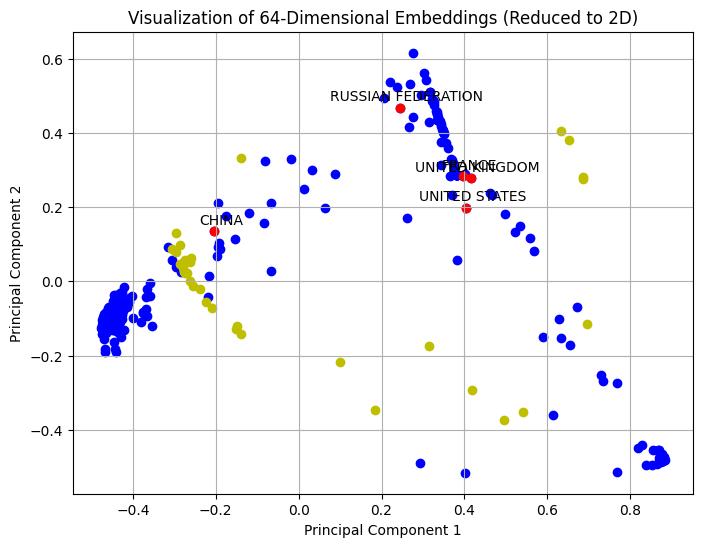

In [65]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming initial_embeddings is your (292, 64) array
# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
#embeddings_2d_voter = pca.fit_transform(initial_embeddings[:len_voters])
#embeddings_2d_org = pca.fit_transform(initial_embeddings[len_voters:])

embeddings_2d_final_voter = pca.fit_transform(final_embeddings[:len_voters])
embedding_2d_five = embeddings_2d_final_voter[the_five_index]
embedding_2d_g_20 = embeddings_2d_final_voter[g_20_index]
embeddings_2d_final_org = pca.fit_transform(final_embeddings[len_voters:])

# Visualize the embeddings in a scatter plot
plt.figure(figsize=(8, 6))
#plt.scatter(embeddings_2d_voter[:, 0], embeddings_2d_voter[:, 1], c='b')
#plt.scatter(embeddings_2d_org[:, 0], embeddings_2d_org[:, 1], c='r')
plt.scatter(embeddings_2d_final_voter[:, 0], embeddings_2d_final_voter[:, 1], c='b')
plt.scatter(embeddings_2d_final_org[:, 0], embeddings_2d_final_org[:, 1], c='y')
plt.scatter(embedding_2d_five[:, 0], embedding_2d_five[:, 1], c='r')

# Annotating each point with its name
for i, name in enumerate(the_five):
    plt.annotate(name, (embedding_2d_five[i, 0], embedding_2d_five[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')


plt.title('Visualization of 64-Dimensional Embeddings (Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
